In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


In [30]:
# Load in your data here
data = pd.read_csv("AEIOCDhc_allPSD.csv") #file name here


<Axes: >

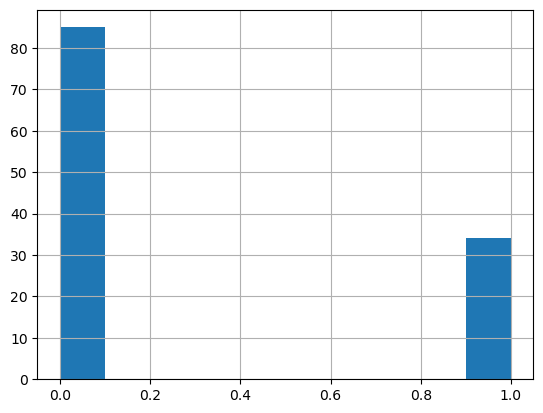

In [31]:
# Data preprocessing
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=None)
y_train.hist()

<Axes: >

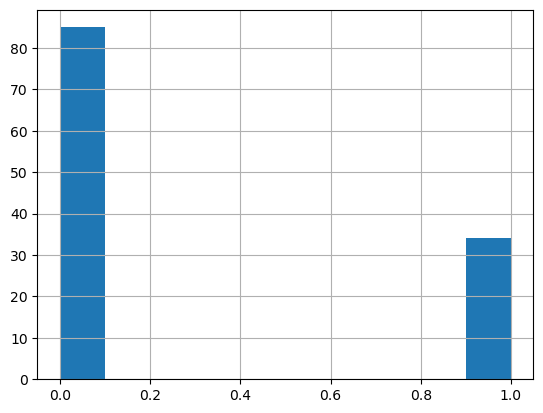

In [32]:
# PCA data
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape
X = X.dropna()

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=30)
y_train.hist()

# SVM Values

In [33]:
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print('SVM accuracy:', svclassifier.score(X_test, y_test))
print('SVM classification report:\n', classification_report(y_test, y_pred))
y_scores = svclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Calculate AUC
roc_auc = auc(fpr, tpr)
print('SVM AUC value:', roc_auc)
newsvm=SVC(kernel='linear', probability=True)
newsvm.fit(X_train_pca, y_train)
y_pred = newsvm.predict(X_test_pca)
print('\nSVM accuracy for PCA:', newsvm.score(X_test_pca, y_test))
print('SVM classification report for PCA:\n', classification_report(y_test, y_pred))
y_scores = newsvm.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('SVM AUC value for PCA:', roc_auc)


SVM accuracy: 0.5
SVM classification report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.33      0.17      0.22         6

    accuracy                           0.50        14
   macro avg       0.44      0.46      0.43        14
weighted avg       0.45      0.50      0.46        14

SVM AUC value: 0.4166666666666667

SVM accuracy for PCA: 0.6428571428571429
SVM classification report for PCA:
               precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       1.00      0.17      0.29         6

    accuracy                           0.64        14
   macro avg       0.81      0.58      0.52        14
weighted avg       0.78      0.64      0.56        14

SVM AUC value for PCA: 0.375


# KNN Values

In [28]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('KNN accuracy:', knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print('KNN classification report:\n',classification_report(y_test, y_pred))
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('KNN AUC value:', roc_auc)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca, y_train)
print('\nKNN accuracy for PCA:', knn.score(X_test_pca, y_test))
y_pred = knn.predict(X_test_pca)
print('KNN classification report for PCA\n', classification_report(y_test, y_pred))
y_scores = knn.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('KNN AUC value for PCA',roc_auc)

KNN accuracy: 0.5454545454545454
KNN classification report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.56      0.75      0.64        12

    accuracy                           0.55        22
   macro avg       0.53      0.53      0.51        22
weighted avg       0.53      0.55      0.52        22

KNN AUC value: 0.4708333333333333

KNN accuracy for PCA: 0.8181818181818182
KNN classification report for PCA
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.67      0.80        12

    accuracy                           0.82        22
   macro avg       0.86      0.83      0.82        22
weighted avg       0.87      0.82      0.82        22

KNN AUC value for PCA 0.8999999999999999


# Random Forest Values

In [29]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
print('Random Forest accuracy:', model.score(X_test, y_test))
y_pred = model.predict(X_test)
print('Random Forest classification report\n',classification_report(y_test, y_pred))
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Random Forest AUC value:', roc_auc)
pmodel = RandomForestClassifier(n_estimators=40)
pmodel.fit(X_train_pca, y_train)
print('\nRandom Forest accuracy for PCA:', pmodel.score(X_test_pca, y_test))
y_pred = pmodel.predict(X_test_pca)
print('Random Forest classification report for PCA:\n',classification_report(y_test, y_pred))
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Random Forest AUC value for PCA:', roc_auc)

Random Forest accuracy: 0.6363636363636364
Random Forest classification report
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.64      0.75      0.69        12

    accuracy                           0.64        22
   macro avg       0.63      0.62      0.62        22
weighted avg       0.63      0.64      0.63        22

Random Forest AUC value: 0.7499999999999999

Random Forest accuracy for PCA: 0.8181818181818182
Random Forest classification report for PCA:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.90      0.75      0.82        12

    accuracy                           0.82        22
   macro avg       0.82      0.82      0.82        22
weighted avg       0.83      0.82      0.82        22

Random Forest AUC value for PCA: 0.9


In [130]:
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [131]:
rfc = RandomForestClassifier()

In [132]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_search_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': range(2, 51), 'max_features': ['sqrt', 'log2', ...], ...}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [133]:
best_params = random_search.best_params_
rfc = RandomForestClassifier(**best_params)

In [134]:
rfc.fit(X_train, y_train)


,n_estimators,36
,criterion,'gini'
,max_depth,2
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [135]:
y_pred = rfc.predict(X_test)


In [136]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.35


# Logistic Regression values

In [137]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Logistic Regression accuracy:', model.score(X_test, y_test))
y_pred = model.predict(X_test)
print('Logistic Regression classification report:\n',classification_report(y_test, y_pred))
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Logistic Regression AUC value:',roc_auc)
pmodel = LogisticRegression()
pmodel.fit(X_train_pca, y_train)
print('\nLogistic Regression accuracy for PCA:',pmodel.score(X_test_pca, y_test))
y_pred = pmodel.predict(X_test_pca)
print('Logistic Regression classification report for PCA:\n',classification_report(y_test, y_pred))
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Logistic Regression AUC value for PCA',roc_auc)

Logistic Regression accuracy: 0.4
Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.33      0.33      0.33         9

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20

Logistic Regression AUC value: 0.40404040404040403

Logistic Regression accuracy for PCA: 0.8
Logistic Regression classification report for PCA:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Logistic Regression AUC value for PCA 0.9191919191919191


/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XGB Values

In [138]:
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred = clf.predict(X_test)
print('XGB accuracy:',clf.score(X_test, y_test))
print('XGB Classification report:\n',classification_report(y_test, y_pred))
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('XGB AUC value:',roc_auc)
pxgb = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
pxgb.fit(X_train_pca, y_train, eval_set=[(X_test_pca, y_test)])
print('\nXGB accuracy for PCA:', pxgb.score(X_test_pca, y_test))
y_pred = pxgb.predict(X_test_pca)
print('XGB classification report for PCA:\n',classification_report(y_test, y_pred))
y_scores = pxgb.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('XBG AUC for PCA:', roc_auc)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[0]	validation_0-logloss:0.75653
[1]	validation_0-logloss:0.78390
[2]	validation_0-logloss:0.73061
[3]	validation_0-logloss:0.75196
[4]	validation_0-logloss:0.76344
XGB accuracy: 0.65
XGB Classification report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.60      0.67      0.63         9

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20

XGB AUC value: 0.5555555555555556
[0]	validation_0-logloss:0.60617
[1]	validation_0-logloss:0.55701
[2]	validation_0-logloss:0.55426
[3]	validation_0-logloss:0.55327
[4]	validation_0-logloss:0.56953
[5]	validation_0-logloss:0.59322

XGB accuracy for PCA: 0.8
XGB classification report for PCA:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.69      1.00      0.82         9

  

# Elastic Net Values

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
print('Mean absolute error:',mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))
pcaX_train = scaler.fit_transform(X_train_pca)
pcaX_test = scaler.fit_transform(X_test_pca)
elastic_net = ElasticNet()
elastic_net.fit(pcaX_train, y_train)
y_pred = elastic_net.predict(pcaX_test)
print('\nMean absolute error for PCA:',mean_absolute_error(y_test, y_pred))
print('Mean squared error for PCA:', mean_squared_error(y_test, y_pred))
print('r2 score for PCA:', r2_score(y_test, y_pred))

Mean absolute error: 0.50139146567718
Mean squared error: 0.25376328217237304
r2 score: -0.01588242046129751

Mean absolute error for PCA: 0.50139146567718
Mean squared error for PCA: 0.25376328217237304
r2 score for PCA: -0.01588242046129751
